<h1 style="font-family: Georgia; font-size:3em;color:#2462C0; font-style:bold">
Optimization Algorithms
</h1><br>

In this notebook, we'll cover **Gradient Descent** algorithm and its variants: Batch Gradient Descent, Mini-Batch Gradient Descent, and Stochastic Gradient Descent. Next, we'll cover **Momentum Methods** such as Momentum, Root Mean Square Propagation (RMSProp), and Adaptive Momentum (Adam). Optimization algorithms have one of the following goals:
- Find global minimum of the objective function. This is feasible if the objective function is convex, i.e any local minimum is a global minimum.
- Find lowest possible value of the objective function within its neighbor. That's usually the case if the objective function in not convex as the case in most deep learning problems.

<h2 style="font-family: Georgia; font-size:2em;color:purple; font-style:bold">
Gradient Descent
</h2>

*Gradient Descent* algorithm is a first-order optimization algorithm. That means it only takes into account first derivative when performing the updates on the parameters. Below is how the algorithm works in the case of a logistic regression:
1. Initialize weights vector $w$ to any random numbers.
2. Pick a value for the learning rate $\alpha$. The learning rate determines how big the step would be on each iteration.
    * If $\alpha$ is very small, it would take long time to converge and become computationally expensive.
    * IF $\alpha$ is large, it may fail to converge and overshoot the minimum.
    * Therefore, plot the cost function against different values of $\alpha$ and pick the value of $\alpha$ that is right before the first value that didn't converge so that we would have a very fast learning algorithm that converges.
    * The most commonly used rates are : *0.001, 0.003, 0.01, 0.03, 0.1, 0.3*.
3. Make sure to scale the data if it's on very different scales. If we don't scale the data, the level curves would be narrower and taller which means it would take longer time to converge. Scale the data to have $\mu = 0$ and $\sigma = 1$. Below is the formula for scaling each example:
$$\frac{x_i - \mu}{\sigma}\tag{1}\\{} $$
4. For each iteration, take the partial derivative of the cost function $J(w)$ w.r.t each $w^j$ (gradient) which is:
$$\frac{\partial}{\partial w^j}J(w) = \nabla_w J\tag{2}$$
The update equation is:
$$w^j = w^j - \alpha \nabla_w J\tag{3}$$
    * Continue the process until the cost function converges. That is, until the error curve becomes flat and doesn't change.
    * Notice that if the slope of the current values of $w > 0$, that means that we're  to the right of optimal $w$ and the update will be negative and will start getting close to the optimal values of $w$. However, if it's negative, the update will be positive and will increase the current values of $w$ to converge to the optimal values of $w$. See below:
<p align="center">
<img src="../images/gradient-descent.jpeg"; style="width: 400px; height: 300px"><br>
<caption><center><u><font color="purple">**Figure 1:**</u> Gradient descent</center></caption>
</p>
    * In addition, on each iteration, the step would be in the direction that gives the maximum change since it's perpendicular to level curves at each step.

In deep learning, optimization algorithms face few challenges:
- The cost functions are not convex; therefore, there is no global minimum. However, the neural network achieves a significantly low error rates.
- Different weights initializations leads to different models.
- With low dimension, local minimum is very common; however, with high dimensional data, saddle points are more common.
- If the cost function is not initialized where it points towards the global solution, it results in excessive training time and may never converge.

<h3 style="font-family: Georgia; font-size:1.5em;color:purple; font-style:bold">
Batch Gradient Descent
</h3>

Batch gradient descent is when we sum up over all examples on each iteration when performing forward propagation and back-propagaton. Therefore, for each update, we have to sum over all examples. The main advantages:
- We can use fixed learning rate during training without worrying about learning rate decay.
- It has straight trajectory towards the minimum and it converges in theory.
- It has unbiased estimate of gradients. The more the examples, the lower the standard error.

The main disadvantages:
- Even though we can use vectorized implementation, it may still be slow to go over all examples especially when we have large datasets.
- Each step of learning happens after going over all examples.

<h3 style="font-family: Georgia; font-size:1.5em;color:purple; font-style:bold">
Mini-Batch Gradient Descent
</h3>

Instead of going over all examples, mini-batch gradient descent sums up over lower number of examples based on batch size. The way it works is as follows:
- Shuffle the training dataset to avoid pre-existng order of examples.
- Partition the training dataset into $b$ batches based on the batch size. If the training set size is not divisible by batch size, the remaining will be its own batch.

The batch size is something we can tune; however, the batch size is usually chosen as power of 2 such as 32, 64, 128, 256, 512, etc.

The main advantages:
- Faster than Batch version because it goes through a lot less examples than Batch.
- Randomly selecting examples will help avoid redundant examples or examples that are very similar that don't contribute much to the learning.
- With batch size < size of training set, it adds noise to the learning process that helps improving generalization error.
- Even though with more examples the estimate would have lower standard error, the return is less than linear compared to the computational burden we incur.

The main disadvantages:
- It won't converge. On each iteration, the learning step may go back and forth due to the noise. Therefore, it wander around the minimum region but never converge,
- Due to the noise, the learning steps have more oscillations and requires to add learning-decay to decrease learning rate as we become closer to the minimum.

With large training datasets, we don't usually need more than 2-10 passes over all training examples (epochs). Note that with batch size $b = m$, we get the Batch Gradient Descent.

<h3 style="font-family: Georgia; font-size:1.5em;color:purple; font-style:bold">
Stochastic Gradient Descent
</h3>

It's the same as mini-batch gradient descent but the batch size $b = 1$. Therefore, learning happen on every example. The main disadvantage is that we can't utilize vectorization over 1 example and becomes very slow. Also, the variance becomes large since we only use 1 example for each learning step. Below is a graph that shows the gradient descent and variants and the direction towards the minimum:
<p align="center">
<img src="../images/gradient-descent-variants.jpeg"; style="width: 400px; height: 300px"><br>
<caption><center><u><font color="purple">**Figure 2:**</u> Gradient descent variants: Batch GD, Mini-Batch GD, and Stochastic GD</center></caption>
</p>

<h2 style="font-family: Georgia; font-size:2em;color:purple; font-style:bold">
Momentum Methods
</h2>

Since mini-batch gradient descent learns from smaller number of examples on each step, it adds noise to the direction towards the minimum (oscillations). Cost function is often very sensitive in the direction of some parameters and not sensitive in the direction of other parameters. Instead of having a learning rate for each parameter, momentum methods solve this issue by using exponential weighted average (moving average) of the past gradients to smooth the steps towards the minimum. Doing so will affect the learning rate by decaying it more as we get closer to the minimum region based on the past gradients. Therefore, momentum methods only affects the update formula (3) and all other implementations such as forward propagation and back-propagation would still be computed the same.

<h3 style="font-family: Georgia; font-size:1.5em;color:purple; font-style:bold">
Momentum
</h3>

Momentum here uses the exponential weighted average of the past gradients to smooth gradients steps in the direction of the convergence. Below are the formulas needed to implement momentum method:
$$v_{dW^{[l]}} = \beta v_{dW^{[l]}} + (1 - \beta) dW^{[l]}\tag{4} \\ $$
$$v_{db^{[l]}} = \beta v_{db^{[l]}} + (1 - \beta) db^{[l]}\tag{5} \\ $$
$$W^{[l]} = W^{[l]} - \alpha v_{dW^{[l]}}\tag{6} \\ $$
$$b^{[l]} = b^{[l]} - \alpha v_{db^{[l]}}\tag{7} \\ $$
$\beta$ reflects how far we go back to include the past gradients. For example, if $\beta = 0.9$, then we average over the past 10 gradients ($\frac{1}{1 - \beta}$).
- $v_{dW^{[l]}}$ and $v_{db^{[l]}}$ are initialized to zeros and have the same dimensions as $dW^l$ and $db^l$ respectively.
- On each learning step, we store a version of $v_{dW^l}$ and $v_{db^l}$.
- The larger the $\beta$, the smoother the gradient steps. However, too large $\beta$ would smooth it too much and it's not good.
- For $\beta = 0$, we get the traditional gradient descent.
- $\beta$ can be tuned along with learning rate  $\alpha$. Common values of $\beta$ range from 0.8 to 0.999. $\beta = 0.9$ is the most common value.

<h3 style="font-family: Georgia; font-size:1.5em;color:purple; font-style:bold">
Root Mean Square Propagation (RMSProp)
</h3>

RMSProp decays the learning rate using exponential weighted average of the square of the gradients. It's supposed to converge faster in the case of the covex functions, and converge to the minimum region in the case of nonconvex function by decaying learning rate and discarding history from the extreme past. Below are the formulas needed to implement RMSProp method:
$$s_{dW^{[l]}} = \beta s_{dW^{[l]}} + (1 - \beta) (dW^{[l]})^2 \tag{8}\\ $$
$$s_{db^{[l]}} = \beta s_{db^{[l]}} + (1 - \beta) (db^{[l]})^2 \tag{9} \\ $$
$$W^{[l]} = W^{[l]} - \alpha \frac{dW^{[l]}}{\sqrt{s_{dW^{[l]}}+ \epsilon}} \tag{10} \\ $$
$$b^{[l]} = b^{[l]} - \alpha \frac{db^{[l]}}{\sqrt{s_{db^{[l]}}+ \epsilon}} \tag{11} \\ $$
- $s_{dW^{[l]}}$ and $s_{db^{[l]}}$ are initialized to zeros and have the same dimensions as $dW^l$ and $db^l$ respectively.
- On each learning step, we store a version of $s_{dW^l}$ and $s_{db^l}$.
- The larger the $\beta$, the smoother the gradient steps. However, too large $\beta$ would smooth it too much and it's not good.
- $\beta$ can be tuned along with learning rate  $\alpha$. Common values of $\beta$ range from 0.8 to 0.999. $\beta = 0.9$ is the most common value.
- We add $\epsilon$ here to avoid underflow issues and dividing by zero. Also, common value for $\epsilon$ is $1e-6$.

<h3 style="font-family: Georgia; font-size:1.5em;color:purple; font-style:bold">
Adaptive Momentum (Adam)
</h3>

Adam combines both momentum and RMSProp by using the corrected version of them. Since at $t = 0$ there would be correction bias error, we divide both momentum and RMSProp by $(1 - \beta^t)$ to correct for the bias where $t$ is the number of steps taken by Adam. Below are the formulas needed to implement Adam:
$$v_{dW^{[l]}} = \beta_1 v_{dW^{[l]}} + (1 - \beta_1) dW^{[l]} \tag{12} \\ $$
$$v_{db^{[l]}} = \beta_1 v_{db^{[l]}} + (1 - \beta_1) db^{[l]} \tag{13} \\ $$
$$s_{dW^{[l]}} = \beta_2 s_{dW^{[l]}} + (1 - \beta_2) (dW^{[l]})^2 \tag{14} \\ $$
$$s_{db^{[l]}} = \beta_2 s_{db^{[l]}} + (1 - \beta_2) (db^{[l]})^2 \tag{15} \\ $$
$$v_{dW^{[l]}}^{corrected} = \frac{v_{dW^{[l]}}} {1 - \beta_1^t} \tag{16} \\ $$
$$v_{db^{[l]}}^{corrected} = \frac{v_{db^{[l]}}} {1 - \beta_1^t} \tag{17} \\ $$
$$s_{dW^{[l]}}^{corrected} = \frac{s_{dW^{[l]}}} {1 - \beta_2^t} \tag{18} \\ $$
$$s_{db^{[l]}}^{corrected} = \frac{s_{db^{[l]}}} {1 - \beta_2^t} \tag{19} \\ $$
$$W^{[l]} = W^{[l]} - \alpha \frac{v_{dW^{[l]}}^{corrected}}{\sqrt{s_{dW^{[l]}}+ \epsilon}} \tag{20} \\ $$
$$b^{[l]} = b^{[l]} - \alpha \frac{v_{db^{[l]}}^{corrected}}{\sqrt{s_{db^{[l]}}+ \epsilon}} \tag{21} \\ $$
-  $v_{dW^{[l]}}, v_{db^{[l]}}, s_{dW^{[l]}},\ and\ s_{db^{[l]}}$ are initialized to zeros and have the same dimensions as $dW^l$ and $db^l$ respectively.
- On each learning step, we store a version of $v_{dW^{[l]}}, v_{db^{[l]}}, s_{dW^{[l]}},\ and\ s_{db^{[l]}}$.
- Compute the corrected version of $v_{dW^{[l]}}, v_{db^{[l]}}, s_{dW^{[l]}},\ and\ s_{db^{[l]}}$.

Default values are: $\beta_1 = 0.9$, $\beta_2 = 0.999$, $\epsilon = 1e-8$, $\alpha = 0.001$. Adam has proven to be effective in many real world applications.

We'll train neural network using mini-batch gradient descent (MB), MB with momentum, MB with RMSProp, and MB with Adam. The dataset we'll be using has images for cats and non-cat. We'll try to build a neural network to classify if the image has cat or not. Each image is 64 x 64 pixels on RGB scale.

Let's import the data and take a look at the shape as well as a sample of a cat image from the training set.

In [1]:
# Loading packages
import os

import h5py
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# import local modules
os.chdir("../scripts/")
from coding_deep_neural_network_from_scratch import (initialize_parameters,
                                                     L_model_forward,
                                                     compute_cost,
                                                     L_model_backward,
                                                     update_parameters,
                                                     accuracy)

%matplotlib inline
sns.set_context("notebook")
plt.style.use("fivethirtyeight")
plt.rcParams['figure.figsize'] = (12, 6)

Training data dimensions:
X's dimension: (12288, 209), Y's dimension: (1, 209)
Test data dimensions:
X's dimension: (12288, 50), Y's dimension: (1, 50)


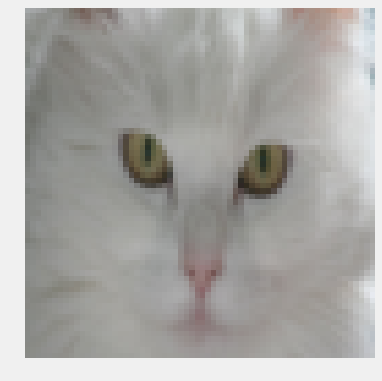

In [2]:
# Import training data
train_dataset = h5py.File("../data/train_catvnoncat.h5")
X_train = np.array(train_dataset["train_set_x"])
Y_train = np.array(train_dataset["train_set_y"])

# Plot a sample image
plt.imshow(X_train[50])
plt.axis("off");

# Import test data
test_dataset = h5py.File("../data/test_catvnoncat.h5")
X_test = np.array(test_dataset["test_set_x"])
Y_test = np.array(test_dataset["test_set_y"])

# Transform data
X_train = X_train.reshape(209, -1).T
X_train = X_train / 255
Y_train = Y_train.reshape(-1, 209)

X_test = X_test.reshape(50, -1).T
X_test = X_test / 255
Y_test = Y_test.reshape(-1, 50)

# print the new shape of both training and test datasets
print("Training data dimensions:")
print("X's dimension: {}, Y's dimension: {}".format(X_train.shape, Y_train.shape))
print("Test data dimensions:")
print("X's dimension: {}, Y's dimension: {}".format(X_test.shape, Y_test.shape))

Let's now write the helper functions to implement all optimization algorithms covered. Mainly, Mini-batch gradient descent (MB), MB with Momentum, MB with RMSProp, MB with Adam.

In [3]:
def random_mini_batches(X, Y, mini_batch_size=64, seed=0):
    """
    Creates a list of random minibatches from (X, Y)

    Arguments:
    X -- input data, shape: input size, number of examples
    Y -- "label" vector, shape: 1, number of examples
    mini_batch_size -- size of the mini-batches, integer

    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    np.random.seed(seed)
    m = X.shape[1]
    mini_batches = []

    # shuffle training set
    permutation = np.random.permutation(m)
    shuffle_X = X[:, permutation]
    shuffle_Y = Y[:, permutation]

    num_complete_minibatches = m // mini_batch_size

    for k in range(num_complete_minibatches):
        mini_batch_X = shuffle_X[:, k*mini_batch_size:(k + 1)*mini_batch_size]
        mini_batch_Y = shuffle_Y[:, k*mini_batch_size:(k + 1)*mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    # check if there are some examples left if m % batch_size != 0
    if m % mini_batch_size != 0:
        mini_batch_X = shuffle_X[:, num_complete_minibatches*mini_batch_size:]
        mini_batch_Y = shuffle_Y[:, num_complete_minibatches*mini_batch_size:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    return mini_batches


def initialize_momentum(parameters):
    """
    Initializes the velocity as a python dictionary with:
                - keys: "dW1", "db1", ..., "dWL", "dbL"
                - values: numpy arrays of zeros of the same shape as the
                          corresponding gradients/parameters.

    Arguments:
    parameters -- python dictionary containing parameters.

    Returns:
    v -- python dictionary containing the current velocity.
    """
    L = len(parameters) // 2
    v = {}

    for l in range(1, L + 1):
        v["dW" + str(l)] = np.zeros_like(parameters["W" + str(l)])
        v["db" + str(l)] = np.zeros_like(parameters["b" + str(l)])

    return v


def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):
    """
    Update parameters using Momentum

    Arguments:
    parameters -- python dictionary containing your parameters:
    grads -- python dictionary containing your gradients for each parameters:
    v -- python dictionary containing the current velocity:
    beta -- the momentum hyperparameter --> scalar
    learning_rate -- the learning rate --> scalar

    Returns:
    parameters -- python dictionary containing your updated parameters
    v -- python dictionary containing your updated velocities
    """
    L = len(parameters) // 2

    for l in range(1, L + 1):
        # update momentum velocity
        v["dW" + str(l)] =\
            beta * v["dW" + str(l)] + (1 - beta) * grads["dW" + str(l)]
        v["db" + str(l)] =\
            beta * v["db" + str(l)] + (1 - beta) * grads["db" + str(l)]
        # update parameters
        parameters["W" + str(l)] =\
            parameters["W" + str(l)] - learning_rate * v["dW" + str(l)]
        parameters["b" + str(l)] =\
            parameters["b" + str(l)] - learning_rate * v["db" + str(l)]

    return parameters, v


def initialize_rmsprop(parameters):
    """
    Initializes the velocity as a python dictionary with:
                - keys: "dW1", "db1", ..., "dWL", "dbL"
                - values: numpy arrays of zeros of the same shape as the
                          corresponding gradients/parameters.

    Arguments:
    parameters -- python dictionary containing parameters.

    Returns:
    s -- python dictionary containing the current velocity.
    """
    L = len(parameters) // 2
    s = {}

    for l in range(1, L + 1):
        s["dW" + str(l)] = np.zeros_like(parameters["W" + str(l)])
        s["db" + str(l)] = np.zeros_like(parameters["b" + str(l)])

    return s


def update_parameters_with_rmsprop(parameters, grads, s, beta, learning_rate,
                                   epsilon=1e-8):
    """
    Update parameters using Momentum

    Arguments:
    parameters -- python dictionary containing parameters:
    grads -- python dictionary containing gradients for each parameters:
    s -- python dictionary containing the current velocity:
    beta -- the momentum hyperparameter --> scalar
    learning_rate -- the learning rate --> scalar
    epsilon -- hyperparameter preventing division by zero in Adam updates

    Returns:
    parameters -- python dictionary containing your updated parameters
    v -- python dictionary containing updated velocities
    """
    L = len(parameters) // 2

    for l in range(1, L + 1):
        # update momentum velocity
        s["dW" + str(l)] =\
            beta * s["dW" + str(l)] +\
            (1 - beta) * np.square(grads["dW" + str(l)])
        s["db" + str(l)] =\
            beta * s["db" + str(l)] +\
            (1 - beta) * np.square(grads["db" + str(l)])
        # update parameters
        parameters["W" + str(l)] -= (learning_rate * grads["dW" + str(l)])\
            / (np.sqrt(s["dW" + str(l)] + epsilon))
        parameters["b" + str(l)] -= (learning_rate * grads["db" + str(l)])\
            / (np.sqrt(s["db" + str(l)] + epsilon))

    return parameters, s


def initialize_adam(parameters):
    """
    Initializes v and s as two python dictionaries with:
                - keys: "dW1", "db1", ..., "dWL", "dbL"
                - values: numpy arrays of zeros of the same shape as the
                          corresponding gradients/parameters.

    Arguments:
    parameters -- python dictionary containing your parameters.

    v -- python dictionary that will contain the exponentially weighted
         average of the gradient.
    s -- python dictionary that will contain the exponentially weighted
         average of the squared gradient.
    """
    L = len(parameters) // 2
    v = {}
    s = {}

    for l in range(1, L + 1):
        v["dW" + str(l)] = np.zeros_like(parameters["W" + str(l)])
        v["db" + str(l)] = np.zeros_like(parameters["b" + str(l)])
        s["dW" + str(l)] = np.zeros_like(parameters["W" + str(l)])
        s["db" + str(l)] = np.zeros_like(parameters["b" + str(l)])

    return v, s


def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate,
                                beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    Update parameters using Adam

    Arguments:
    parameters -- python dictionary containing parameters:
    grads -- python dictionary containing gradients for each parameters:
    v -- Adam variable, moving average of the first gradient
    s -- Adam variable, moving average of the squared gradient
    learning_rate -- the learning rate, scalar.
    beta1 -- Exponential decay hyperparameter for the first moment estimates
    beta2 -- Exponential decay hyperparameter for the second moment estimates
    epsilon -- hyperparameter preventing division by zero in Adam updates

    Returns:
    parameters -- python dictionary containing updated parameters
    v -- Adam variable, moving average of the first gradient
    s -- Adam variable, moving average of the squared gradient
    """
    L = len(parameters) // 2
    v_corrected = {}
    s_corrected = {}

    for l in range(1, L + 1):
        # update the moving avergae of both first gradient and squared gradient
        v["dW" + str(l)] = beta1 * v["dW" + str(l)] +\
            (1 - beta1) * grads["dW" + str(l)]
        v["db" + str(l)] = beta1 * v["db" + str(l)] +\
            (1 - beta1) * grads["db" + str(l)]
        s["dW" + str(l)] = beta2 * s["dW" + str(l)] +\
            (1 - beta2) * np.square(grads["dW" + str(l)])
        s["db" + str(l)] = beta2 * s["db" + str(l)] + \
            (1 - beta2) * np.square(grads["db" + str(l)])

        # compute the corrected-bias estimate of the moving averages
        v_corrected["dW" + str(l)] = v["dW" + str(l)] / (1 - beta1**t)
        v_corrected["db" + str(l)] = v["db" + str(l)] / (1 - beta1**t)
        s_corrected["dW" + str(l)] = s["dW" + str(l)] / (1 - beta2**t)
        s_corrected["db" + str(l)] = s["db" + str(l)] / (1 - beta2**t)

        # update parameters
        parameters["W" + str(l)] -= (learning_rate * v_corrected["dW" + str(l)])\
            / (np.sqrt(s_corrected["dW" + str(l)] + epsilon))
        parameters["b" + str(l)] -= (learning_rate * v_corrected["db" + str(l)])\
            / (np.sqrt(s_corrected["db" + str(l)] + epsilon))

    return parameters, v, s


def model(X, Y, layers_dims, optimizer="adam", learning_rate=0.01,
          mini_batch_size=64, beta=0.9, beta1=0.9, beta2=0.999, epsilon=1e-8,
          num_epochs=3000, print_cost=True, activation_fn="relu"):
    """
    Implements multi-neural network model which can be run in different
    optimizer modes.

    Arguments:
    X -- input data, shape: number of features, number of examples
    Y -- label vector, shape: 1, number of examples
    layers_dims -- python list, containing the size of each layer
    optimizer -- "momentum", "rmsprop", or "adam".
    learning_rate -- the learning rate --> scalar.
    mini_batch_size -- the size of a mini batch
    beta -- Momentum/RMSProp hyperparameter
    beta1 -- Exponential decay hyperparameter for the past gradients
    beta2 -- Exponential decay hyperparameter for the past squared gradients
    epsilon -- hyperparameter preventing division by zero
    num_epochs -- number of epochs
    print_cost -- True to print the cost every 1000 epochs
    activation_fn -- function to be used on hidden layers: "relu", or "tanh"

    Returns:
    parameters -- python dictionary containing updated parameters
    """
    # set random seed to get consistent output
    seed = 1
    np.random.seed(seed)

    # initialize parameters
    parameters = initialize_parameters(layers_dims)

    # initialize moving averages based on optimizer modes
    assert(optimizer == "mb" or optimizer == "momentum" or
           optimizer == "rmsprop" or optimizer == "adam")

    if optimizer == "momentum":
        v = initialize_momentum(parameters)

    elif optimizer == "rmsprop":
        s = initialize_rmsprop(parameters)

    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
        t = 0

    # initialize costs list
    costs = []

    # iterate over number of epochs
    for epoch in range(num_epochs):
        # split the training data into mini batches
        seed += 1
        mini_batches = random_mini_batches(X, Y, mini_batch_size, seed=seed)

        # iterate over mini batches
        for mini_batch in mini_batches:
            mini_batch_X, mini_batch_Y = mini_batch

            # compute fwd prop
            AL, caches = L_model_forward(
                mini_batch_X, parameters, activation_fn)

            # compute cost
            cost = compute_cost(AL, mini_batch_Y)

            # compute gradients
            grads = L_model_backward(AL, mini_batch_Y, caches, activation_fn)

            # update parameters
            if optimizer == "mb":
                parameters = update_parameters(
                    parameters, grads, learning_rate)

            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(
                    parameters, grads, v, beta, learning_rate)

            elif optimizer == "rmsprop":
                parameters, s = update_parameters_with_rmsprop(
                    parameters, grads, s, beta, learning_rate, epsilon)

            elif optimizer == "adam":
                t += 1
                parameters, v, s = update_parameters_with_adam(
                    parameters, grads, v, s, t, learning_rate, beta1, beta2,
                    epsilon)

        # compute epoch cost
        AL, caches = L_model_forward(
            X_train, parameters, activation_fn)
        cost = compute_cost(AL, Y_train)

        if epoch % 100 == 0:
            costs.append(cost)

    # plot the cost
    plt.plot(costs)
    plt.ylabel('Cost')
    plt.xlabel('Epochs (per hundreds)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters

Now, we're ready to train the neural network using different learning algorithms.

In [ ]:
# Setup layers dimensions
layers_dims = [X_train.shape[0], 200, 200, 1]

# train NN with mini-batch gradient descent only
parameters = model(X_train, Y_train, layers_dims, optimizer="mb",
                   learning_rate=0.03, mini_batch_size=64,
                   beta1=0.9, num_epochs=3000, activation_fn="tanh")

# print the test accuracy
print("The training accuracy rate: {}".format(
    accuracy(X_train, parameters, Y_train, "tanh")[-7:]))
print("The test accuracy rate: {}".format(
    accuracy(X_test, parameters, Y_test, "tanh")[-7:]))

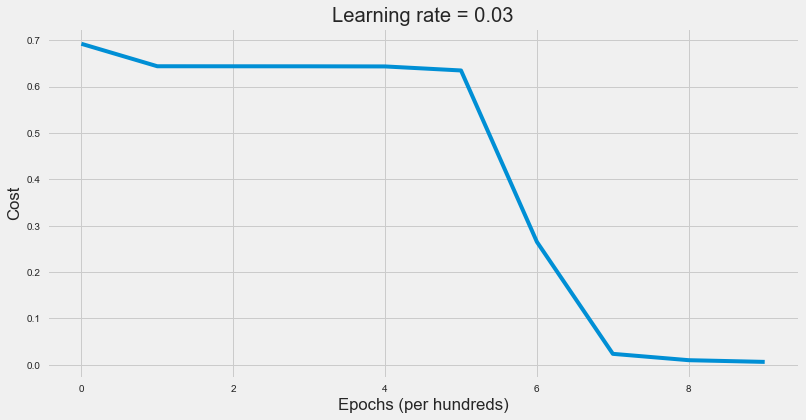

The training accuracy rate: 100.00%.
The test accuracy rate: 70.00%.


In [5]:
# train NN with mini-batch and momentum
parameters = model(X_train, Y_train, layers_dims, optimizer="momentum",
                   learning_rate=0.03, mini_batch_size=64,
                   beta1=0.9, num_epochs=1000, activation_fn="tanh")

# print the test accuracy
print("The training accuracy rate: {}".format(
    accuracy(X_train, parameters, Y_train, "tanh")[-8:]))
print("The test accuracy rate: {}".format(
    accuracy(X_test, parameters, Y_test, "tanh")[-7:]))

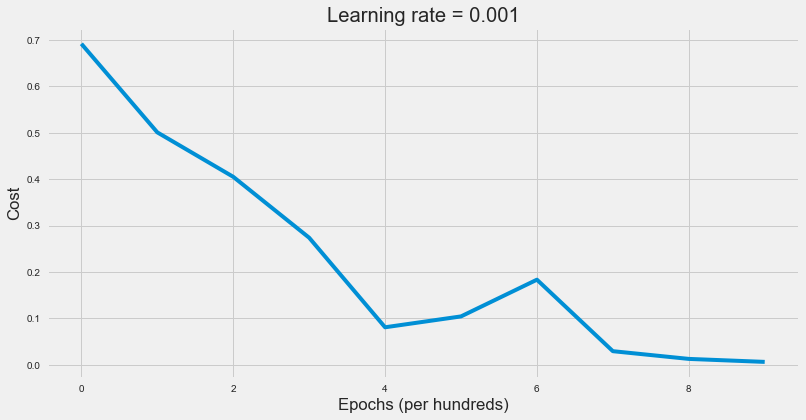

The training accuracy rate: 100.00%.
The test accuracy rate: 64.00%.


In [6]:
# train NN with mini-batch and RMPSProp
parameters = model(X_train, Y_train, layers_dims, optimizer="rmsprop",
                   learning_rate=0.001, mini_batch_size=64,
                   beta1=0.9, epsilon=1e-6, num_epochs=1000,
                   activation_fn="tanh")

# print the test accuracy
print("The training accuracy rate: {}".format(
    accuracy(X_train, parameters, Y_train, "tanh")[-8:]))
print("The test accuracy rate: {}".format(
    accuracy(X_test, parameters, Y_test, "tanh")[-7:]))

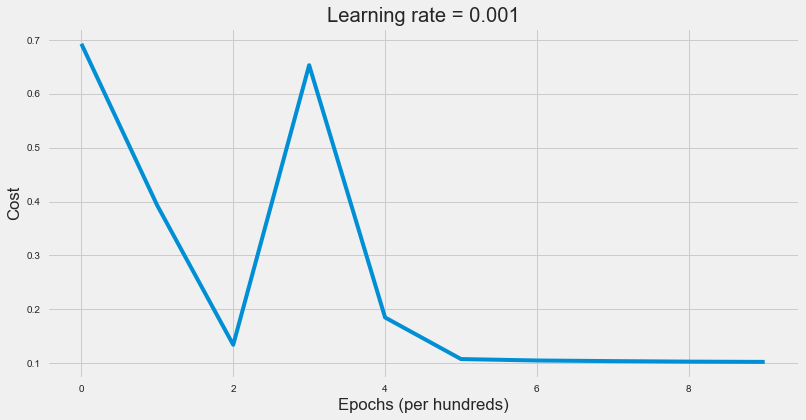

The training accuracy rate: 97.13%.
The test accuracy rate: 72.00%.


In [7]:
# train NN with mini-batch and Adam
parameters = model(X_train, Y_train, layers_dims, optimizer="adam",
                   learning_rate=0.001, mini_batch_size=64,
                   beta1=0.9, beta2=0.999, epsilon=1e-8,
                   num_epochs=1000, activation_fn="tanh")

# print the test accuracy
print("The training accuracy rate: {}".format(
    accuracy(X_train, parameters, Y_train, "tanh")[-7:]))
print("The test accuracy rate: {}".format(
    accuracy(X_test, parameters, Y_test, "tanh")[-7:]))

We're by no means comparing the performance of the optimization algorithms. The goal is to see how each algorithm works and all of them are very effective and can be tuned to yield the best results.

<h2 style="font-family: Georgia; font-size:2em;color:purple; font-style:bold">
Conclusion
</h2>

The most popular optimization algorithms are: Mini-batch gradient descent (MB), MB with RMSProp, and MB with Adam. Even though neural network doesn't converge to a global minimum, it's able to arrive at a significantly low values of the loss function and having a very low error rates. Below are some key takeaways:
- There is no definitive guide of which optimization algorithm to use under specific scenarios. It's more trial and error. However, the optimization algorithms with momentum methods such RMSProp and Adam with mini-batch gradient descent are very effective.
- Momentum methods can be used with Batch, mini-batch, and stochastic gradient descent.
- Batch size $b$ can be tuned using a validation set. It plays a critical role in the performance of the learning algorithm.
- $\beta$ that measures the velocity of gradients or how far back to go to include past gradients can be tuned too.
- Gradient descent is a first-order optimization algorithm, which means it doesn't take into account the second derivatives of the cost function. However, the curvature of the function affects the size of each learning step. The gradient measures the steepness of the curve but the second derivative measures the curvature of the curve. Therefore, if:
    - Second derivative = 0 $\rightarrow$ the curvature is linear. Therefore, the step size = the learning rate $\alpha$.
    - Second derivative > 0 $\rightarrow$ the curvature is going upward. Therefore, the step size < the learning rate $\alpha$ and may lead to divergence.
    - Second derivative < 0 $\rightarrow$ the curvature is going downward. Therefore, the step size > the learning rate $\alpha$.
    
    As a result, the direction that looks promising to the gradient may not be so and may lead to slow the learning process or even diverge.
- If Hessian matrix has poor conditioning number, i.e the direction of the most curvature has much more curvature than the direction of the lowest curvature. This will lead the cost function to be very sensitive in some directions and insensitive in other directions. As a result, it will make it harder on the gradient because the direction that looks promising for the gradient may not lead to big changes in the cost function.
- The norm of the gradient $g^Tg$ is supposed to decrease slowly with each learning step because the curve is getting flatter and steepness of the curve will decrease. However, we see that the norm of the gradient is increasing. That's because of the curvature of the curve. Nonetheless, even though the gradients' norm is increasing, the neural network was able to achieve a very low error rates.
- Newton's method is a second order optimization algorithm where it jumps right away towards the minimum. It takes into account the second derivatives and the update rule is: $w = w - \frac{g}{H}$ where $g$ is the gradient and $H$ is the hessian matrix that contains the second derivatives. The main disadvantages of Newton's method are:
    - Inverting the hessian matrix is computationally expensive since it is a square matrix in the number of the parameters. With neural network, we have hundreds of thousands or millions of parameters. Also, the inversion has to occur on every learning step.
    - If there is a saddle point, which is very common with high dimensional data, it does worse than the gradient descent because it stucks on the saddle point. However, gradient descent can manage to escape it with a good learning rate.